Selected 11 features using RFE with cross-validation.
Reduced feature dimensions to 5 using PCA.
Performing LINEAR SVM with original features:
Best parameters: {'C': 0.1}
Average accuracy: 0.5833, Standard deviation: 0.0422


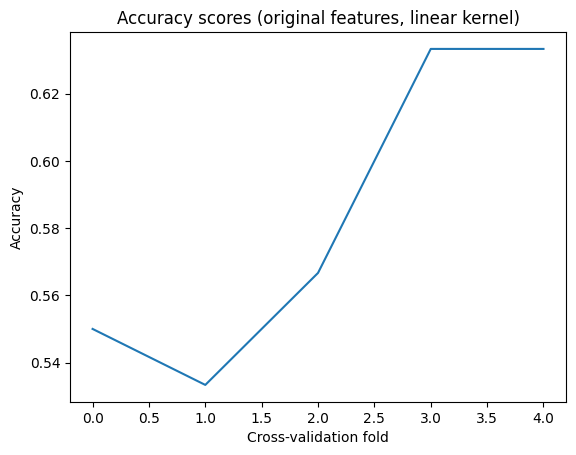

Performing RBF SVM with original features:
Best parameters: {'gamma': 1, 'C': 1}
Average accuracy: 0.5500, Standard deviation: 0.0465


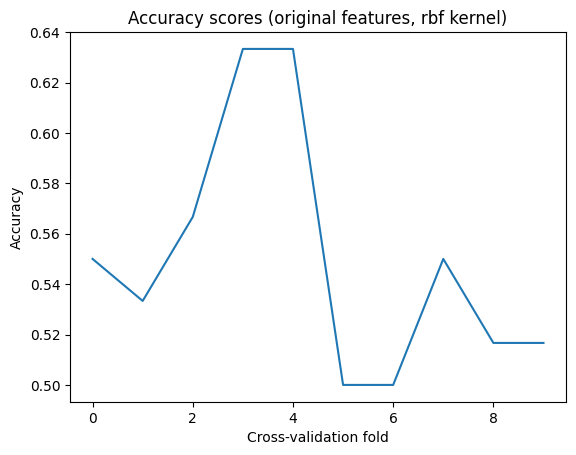

Performing POLY SVM with original features:
Best parameters: {'degree': 4, 'C': 100}
Average accuracy: 0.5544, Standard deviation: 0.0401


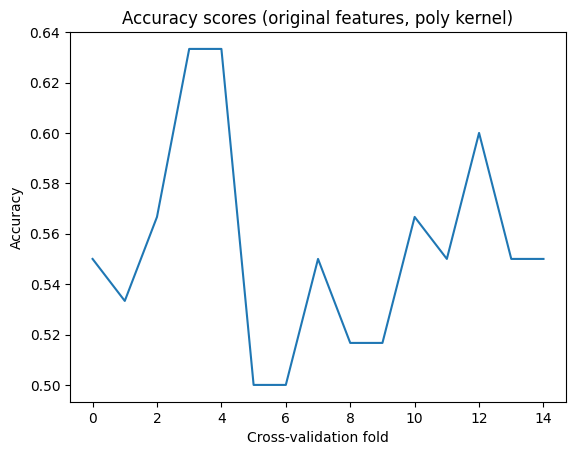

Performing LINEAR SVM with RFE features:
Best parameters: {'C': 0.01}
Average accuracy: 0.5700, Standard deviation: 0.0067


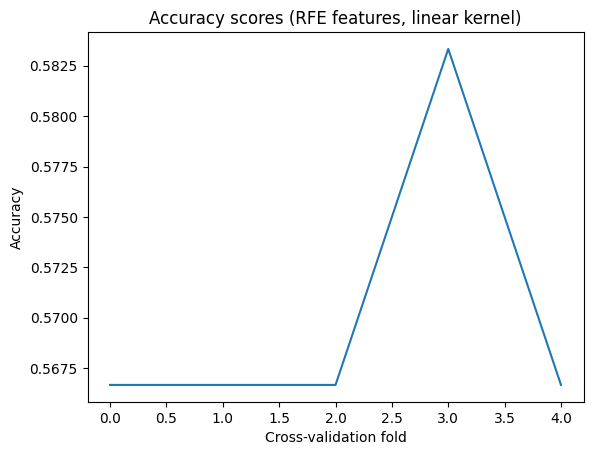

Performing RBF SVM with RFE features:
Best parameters: {'gamma': 10, 'C': 100}
Average accuracy: 0.5433, Standard deviation: 0.0300


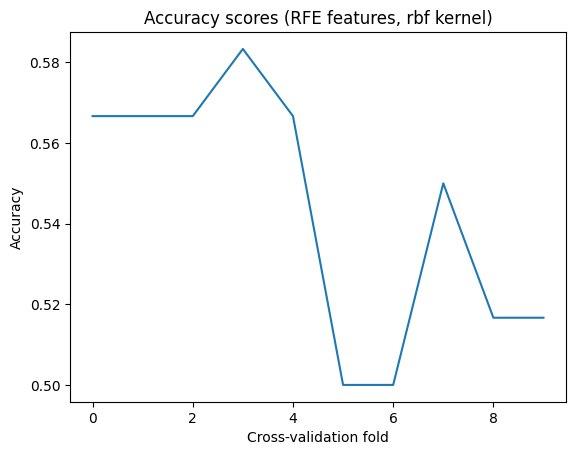

Performing POLY SVM with RFE features:
Best parameters: {'degree': 4, 'C': 100}
Average accuracy: 0.5600, Standard deviation: 0.0393


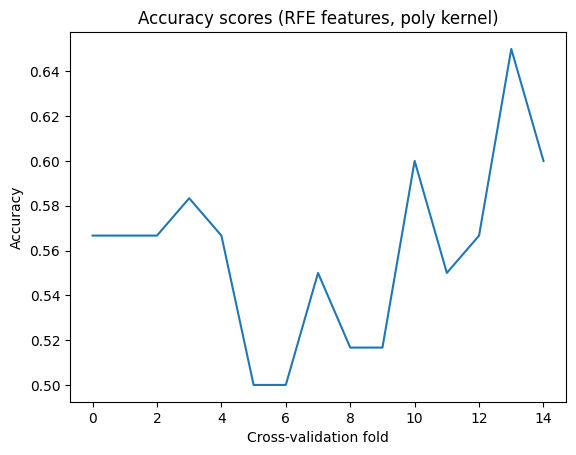

Performing LINEAR SVM with PCA features:
Best parameters: {'C': 0.01}
Average accuracy: 0.5467, Standard deviation: 0.0194


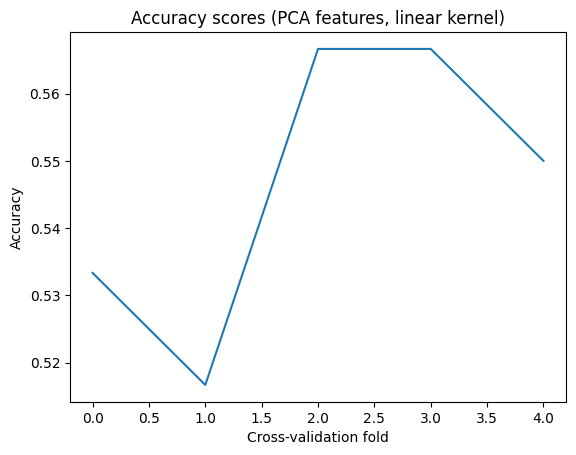

Performing RBF SVM with PCA features:
Best parameters: {'gamma': 0.1, 'C': 0.01}
Average accuracy: 0.5317, Standard deviation: 0.0241


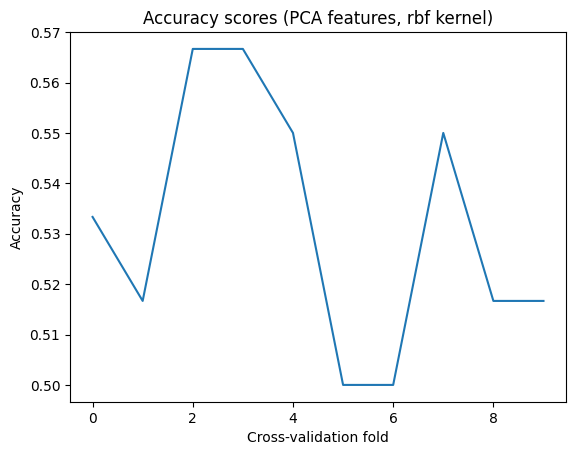

Performing POLY SVM with PCA features:
Best parameters: {'degree': 3, 'C': 1}
Average accuracy: 0.5322, Standard deviation: 0.0247


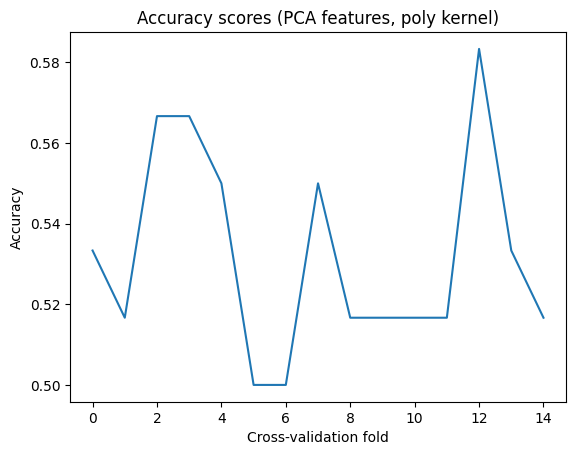


Summary of results:
Feature Set | Kernel | Avg Accuracy | Std Dev
----------------------------------------------
original   | linear | 0.5833     | 0.0422
original   | rbf    | 0.5500     | 0.0465
original   | poly   | 0.5544     | 0.0401
RFE        | linear | 0.5700     | 0.0067
RFE        | rbf    | 0.5433     | 0.0300
RFE        | poly   | 0.5600     | 0.0393
PCA        | linear | 0.5467     | 0.0194
PCA        | rbf    | 0.5317     | 0.0241
PCA        | poly   | 0.5322     | 0.0247


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# Load data:
data = pd.read_csv('preprocessed_2.csv')

# Separate features and labels:
X = data.drop('results', axis=1)
y = data['results']

# Recursive Feature Elimination:
svm = SVC(kernel='linear')
rfecv = RFECV(estimator=svm, cv=5)
X_rfecv = rfecv.fit_transform(X, y)
print(f"Selected {rfecv.n_features_} features using RFE with cross-validation.")

# Principal Component Analysis:
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)
print(f"Reduced feature dimensions to {pca.n_components_} using PCA.")

# Define the parameter grids for GridSearchCV and RandomizedSearchCV:
param_grid_linear = {'C': [0.01, 0.1, 1, 10, 100]}
param_grid_rbf = {'C': [0.01, 0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10, 100]}
param_grid_poly = {'C': [0.01, 0.1, 1, 10, 100], 'degree': [2, 3, 4, 5]}

# Initialize dictionaries to store accuracy scores and standard deviations:
accuracy_scores = {}
std_scores = {}

# Perform GridSearchCV and RandomizedSearchCV for each feature set and SVM kernel:
for X_features, X_name in zip([X, X_rfecv, X_pca], ['original', 'RFE', 'PCA']):
    accuracy_scores[X_name] = []
    std_scores[X_name] = []
    for kernel in ['linear', 'rbf', 'poly']:
        print(f"Performing {kernel.upper()} SVM with {X_name} features:")

        if kernel == 'linear':
            clf = SVC(kernel=kernel)
            grid_search = GridSearchCV(clf, param_grid_linear, cv=5, n_jobs=-1)
        elif kernel == 'rbf':
            clf = SVC(kernel=kernel)
            randomized_search = RandomizedSearchCV(clf, param_grid_rbf, cv=5, n_jobs=-1)
        else:
            clf = SVC(kernel=kernel)
            randomized_search = RandomizedSearchCV(clf, param_grid_poly, cv=5, n_jobs=-1)

        if kernel != 'linear':
            randomized_search.fit(X_features, y)
            print(f"Best parameters: {randomized_search.best_params_}")
            clf.set_params(**randomized_search.best_params_)
            clf.fit(X_features, y)
        else:
            grid_search.fit(X_features, y)
            print(f"Best parameters: {grid_search.best_params_}")
            clf.set_params(**grid_search.best_params_)
            clf.fit(X_features, y)
            scores = []
        cv = 5
        for i in range(cv):
            X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2, random_state=i)
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            scores.append(accuracy_score(y_test, y_pred))
        
        # Calculate the average accuracy and standard deviation
        avg_accuracy = np.mean(scores)
        std_dev = np.std(scores)
        accuracy_scores[X_name].append(avg_accuracy)
        std_scores[X_name].append(std_dev)

        # Print the average accuracy and standard deviation
        print(f"Average accuracy: {avg_accuracy:.4f}, Standard deviation: {std_dev:.4f}")

        # Plot the accuracy scores as a line chart
        plt.plot(scores)
        plt.title(f"Accuracy scores ({X_name} features, {kernel} kernel)")
        plt.xlabel("Cross-validation fold")
        plt.ylabel("Accuracy")
        plt.show()

# Print the final results in a tabular format
print("\nSummary of results:")
print("Feature Set | Kernel | Avg Accuracy | Std Dev")
print("----------------------------------------------")
for X_name in ['original', 'RFE', 'PCA']:
    for i, kernel in enumerate(['linear', 'rbf', 'poly']):
        print(f"{X_name:10} | {kernel:6} | {accuracy_scores[X_name][i]:.4f}     | {std_scores[X_name][i]:.4f}")



Results for RFECV features:
Model | max_depth | min_samples_split | min_samples_leaf | Accuracy
----------------------------------------------------------------
    1 |         3 |                2 |               1 | 0.5556
    2 |         3 |                2 |               2 | 0.5556
    3 |         3 |                2 |               4 | 0.5556
    4 |         3 |                5 |               1 | 0.5556
    5 |         3 |                5 |               2 | 0.5556
    6 |         3 |                5 |               4 | 0.5556
    7 |         3 |               10 |               1 | 0.5556
    8 |         3 |               10 |               2 | 0.5556
    9 |         3 |               10 |               4 | 0.5556
   10 |         5 |                2 |               1 | 0.5111
   11 |         5 |                2 |               2 | 0.4889
   12 |         5 |                2 |               4 | 0.4889
   13 |         5 |                5 |               1 | 0.5000
   14 

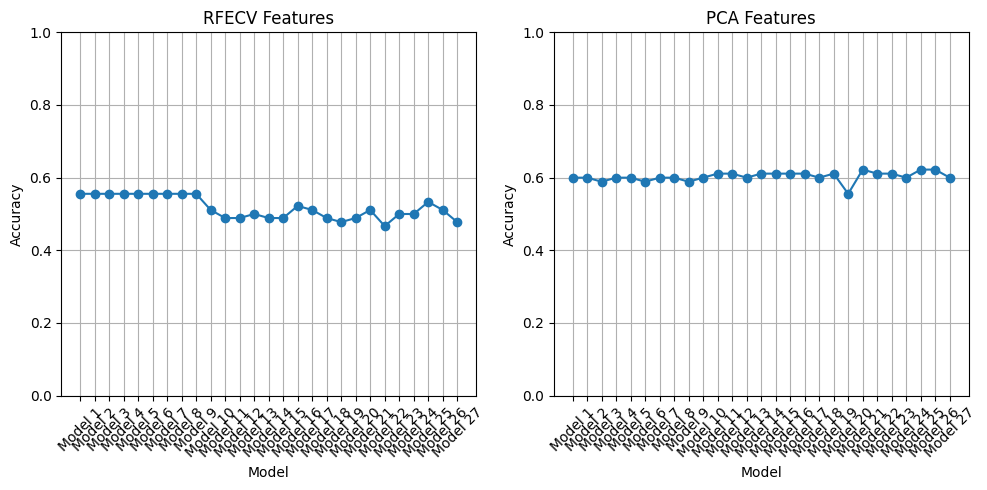

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('preprocessed_2.csv')

# Define the feature matrix X and the target variable y
X = data.drop('results', axis=1)
y = data['results']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Perform feature selection with Recursive Feature Elimination with Cross-Validation (RFECV)
clf = DecisionTreeClassifier()
selector = RFECV(clf, cv=5)
selector.fit(X_train_std, y_train)
X_train_rfecv = selector.transform(X_train_std)
X_test_rfecv = selector.transform(X_test_std)

# Perform dimensionality reduction with Principal Component Analysis (PCA)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

# Define the parameter grid for GridSearchCV
param_grid = {'max_depth': [3, 5, 7],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

# Define a list of tuples for different combinations of feature sets and parameters
model_configs = [(X_train_rfecv, X_test_rfecv, 'RFECV'),
                 (X_train_pca, X_test_pca, 'PCA')]

# Train and evaluate decision trees with different feature sets and parameters
# Train and evaluate decision trees with different feature sets and parameters
results = []
for X_train_features, X_test_features, X_name in model_configs:
    feature_results = []
    print(f"\nResults for {X_name} features:")
    print("Model | max_depth | min_samples_split | min_samples_leaf | Accuracy")
    print("----------------------------------------------------------------")
    model_counter = 1
    for max_depth in [3, 5, 7]:
        for min_samples_split in [2, 5, 10]:
            for min_samples_leaf in [1, 2, 4]:
                # Create an instance of the decision tree classifier with the given parameters
                clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, 
                                             min_samples_leaf=min_samples_leaf)
                
                # Train the model on the given feature set
                clf.fit(X_train_features, y_train)
                
                # Evaluate the model on the test set
                y_pred = clf.predict(X_test_features)
                accuracy = accuracy_score(y_test, y_pred)
                
                print(f"{model_counter:5} | {max_depth:9} | {min_samples_split:16} | {min_samples_leaf:15} | {accuracy:.4f}")
                feature_results.append(accuracy)
                model_counter += 1
                
    results.append((X_name, feature_results))

# Plot the results
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

for i, (X_name, feature_results) in enumerate(results):
    ax = axes[i]
    ax.plot(feature_results, 'o-')
    ax.set_title(f"{X_name} Features")
    ax.set_xlabel("Model")
    ax.set_ylabel("Accuracy")
    ax.set_xticks(range(len(feature_results)))
    ax.set_xticklabels([f"Model {j+1}" for j in range(len(feature_results))], rotation=45)
    ax.set_ylim([0, 1])
    ax.grid(True)

plt.tight_layout()
plt.show()




Neural Network Architectures and their Accuracy Scores
-------------------------------------------------------
Metal device set to: Apple M1


/var/folders/jh/br2g7y6n1xq5chb66nk5wn_m0000gn/T/ipykernel_61288/4094376016.py:78: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  nn_model = KerasClassifier(build_fn=create_nn_model, arch=arch, epochs=100, batch_size=32, verbose=0)
2023-05-06 22:22:25.257506: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-05-06 22:22:25.257914: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2023-05-06 22:22:25.467808: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU fre

3/3 [==============================] - 0s 6ms/step


2023-05-06 22:22:28.999309: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/var/folders/jh/br2g7y6n1xq5chb66nk5wn_m0000gn/T/ipykernel_61288/4094376016.py:78: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  nn_model = KerasClassifier(build_fn=create_nn_model, arch=arch, epochs=100, batch_size=32, verbose=0)


Architecture 1: Accuracy = 0.6222


2023-05-06 22:22:29.247205: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 0s 7ms/step


2023-05-06 22:22:32.819816: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/var/folders/jh/br2g7y6n1xq5chb66nk5wn_m0000gn/T/ipykernel_61288/4094376016.py:78: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  nn_model = KerasClassifier(build_fn=create_nn_model, arch=arch, epochs=100, batch_size=32, verbose=0)


Architecture 2: Accuracy = 0.6333


2023-05-06 22:22:33.250776: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 0s 7ms/step


2023-05-06 22:22:36.838245: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/var/folders/jh/br2g7y6n1xq5chb66nk5wn_m0000gn/T/ipykernel_61288/4094376016.py:78: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  nn_model = KerasClassifier(build_fn=create_nn_model, arch=arch, epochs=100, batch_size=32, verbose=0)


Architecture 3: Accuracy = 0.6222


2023-05-06 22:22:37.083389: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 0s 8ms/step


2023-05-06 22:22:40.994174: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/var/folders/jh/br2g7y6n1xq5chb66nk5wn_m0000gn/T/ipykernel_61288/4094376016.py:78: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  nn_model = KerasClassifier(build_fn=create_nn_model, arch=arch, epochs=100, batch_size=32, verbose=0)


Architecture 4: Accuracy = 0.6111


2023-05-06 22:22:41.247882: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 0s 7ms/step


2023-05-06 22:22:44.845516: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/var/folders/jh/br2g7y6n1xq5chb66nk5wn_m0000gn/T/ipykernel_61288/4094376016.py:78: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  nn_model = KerasClassifier(build_fn=create_nn_model, arch=arch, epochs=100, batch_size=32, verbose=0)


Architecture 5: Accuracy = 0.6333


2023-05-06 22:22:45.122125: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 0s 10ms/step


2023-05-06 22:22:49.054912: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/var/folders/jh/br2g7y6n1xq5chb66nk5wn_m0000gn/T/ipykernel_61288/4094376016.py:78: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  nn_model = KerasClassifier(build_fn=create_nn_model, arch=arch, epochs=100, batch_size=32, verbose=0)


Architecture 6: Accuracy = 0.5778


2023-05-06 22:22:49.309607: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 0s 8ms/step


2023-05-06 22:22:53.193612: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/var/folders/jh/br2g7y6n1xq5chb66nk5wn_m0000gn/T/ipykernel_61288/4094376016.py:78: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  nn_model = KerasClassifier(build_fn=create_nn_model, arch=arch, epochs=100, batch_size=32, verbose=0)


Architecture 7: Accuracy = 0.6333


2023-05-06 22:22:53.843377: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 0s 9ms/step


2023-05-06 22:22:57.890303: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/var/folders/jh/br2g7y6n1xq5chb66nk5wn_m0000gn/T/ipykernel_61288/4094376016.py:78: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  nn_model = KerasClassifier(build_fn=create_nn_model, arch=arch, epochs=100, batch_size=32, verbose=0)


Architecture 8: Accuracy = 0.6333


2023-05-06 22:22:58.159438: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 0s 10ms/step
Architecture 9: Accuracy = 0.6333


2023-05-06 22:23:02.474183: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


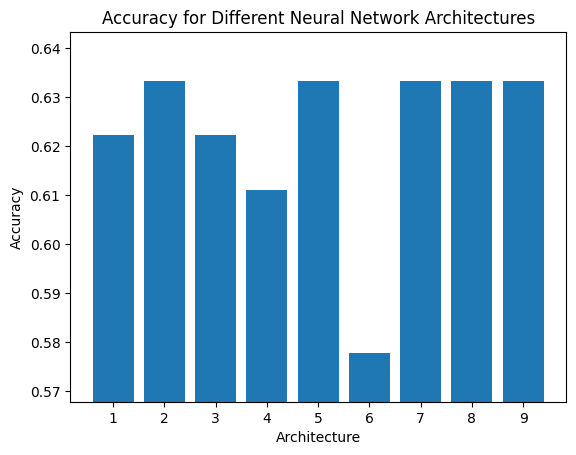

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam

data = pd.read_csv('preprocessed_2.csv')

X = data.drop('results', axis=1)
y = data['results']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

def create_nn_model(arch):
    model = Sequential()
    
    if arch == 1:
        model.add(Dense(8, input_dim=X_train_std.shape[1], activation='relu'))
        model.add(Dense(1, activation='sigmoid'))
    elif arch == 2:
        model.add(Dense(16, input_dim=X_train_std.shape[1], activation='relu'))
        model.add(Dense(8, activation='relu'))
        model.add(Dense(1, activation='sigmoid'))
    elif arch == 3:
        model.add(Dense(32, input_dim=X_train_std.shape[1], activation='relu'))
        model.add(Dense(16, activation='relu'))
        model.add(Dense(1, activation='sigmoid'))
    elif arch == 4:
        model.add(Dense(16, input_dim=X_train_std.shape[1], activation='relu'))
        model.add(Dense(16, activation='relu'))
        model.add(Dense(8, activation='relu'))
        model.add(Dense(1, activation='sigmoid'))
    elif arch == 5:
        model.add(Dense(32, input_dim=X_train_std.shape[1], activation='relu'))
        model.add(Dense(64, activation='relu'))
        model.add(Dense(1, activation='sigmoid'))
    elif arch == 6:
        model.add(Dense(128, input_dim=X_train_std.shape[1], activation='relu'))
        model.add(Dense(64, activation='relu'))
        model.add(Dense(32, activation='relu'))
        model.add(Dense(1, activation='sigmoid'))
    elif arch == 7:
        model.add(Dense(32, input_dim=X_train_std.shape[1], activation='relu'))
        model.add(Dense(64, activation='relu'))
        model.add(Dense(32, activation='relu'))
        model.add(Dense(1, activation='sigmoid'))
    elif arch == 8:
        model.add(Dense(256, input_dim=X_train_std.shape[1], activation='relu'))
        model.add(Dense(128, activation='relu'))
        model.add(Dense(64, activation='relu'))
        model.add(Dense(1, activation='sigmoid'))
    elif arch == 9:
        model.add(Dense(256, input_dim=X_train_std.shape[1], activation='relu'))
        model.add(Dense(128, activation='relu'))
        model.add(Dense(64, activation='relu'))
        model.add(Dense(32, activation='relu'))
        model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model




architectures = list(range(1, 10))
results = []

print("Neural Network Architectures and their Accuracy Scores")
print("-------------------------------------------------------")
for arch in architectures:
    nn_model = KerasClassifier(build_fn=create_nn_model, arch=arch, epochs=100, batch_size=32, verbose=0)
    nn_model.fit(X_train_std, y_train)
    y_pred = nn_model.predict(X_test_std)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Architecture {arch}: Accuracy = {accuracy:.4f}")
    results.append(accuracy)

# Plot the results
plt.bar(architectures, results)
plt.xlabel('Architecture')
plt.ylabel('Accuracy')
plt.title('Accuracy for Different Neural Network Architectures')
plt.xticks(architectures)
plt.ylim([min(results) - 0.01, max(results) + 0.01])
plt.show()


Testing network with hidden sizes: [16]
Testing network with hidden sizes: [32]
Testing network with hidden sizes: [64]
Testing network with hidden sizes: [16, 16]
Testing network with hidden sizes: [32, 32]
Testing network with hidden sizes: [64, 64]


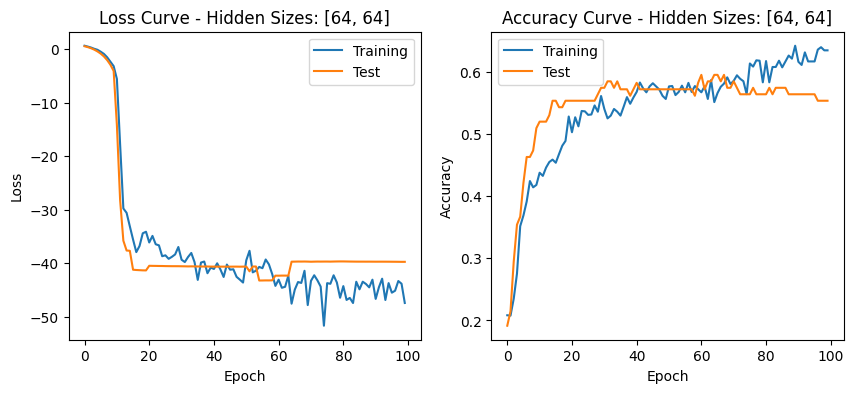

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader, random_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the neural network model
class Net(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size):
        super(Net, self).__init__()
        self.hidden_layers = nn.ModuleList()
        self.hidden_layers.append(nn.Linear(input_size, hidden_sizes[0]))
        for i in range(1, len(hidden_sizes)):
            self.hidden_layers.append(nn.Linear(hidden_sizes[i-1], hidden_sizes[i]))
        self.output_layer = nn.Linear(hidden_sizes[-1], output_size)
        self.activation = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        for layer in self.hidden_layers:
            x = self.activation(layer(x))
        x = self.sigmoid(self.output_layer(x))
        return x

# Load the data
data = pd.read_csv('preprocessed_2.csv')
X = torch.Tensor(data.drop('results', axis=1).values)
y = torch.Tensor(data['results'].values)

# Split the data into training and test sets
dataset = TensorDataset(X, y)
train_size = int(0.7 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Standardize the input data
scaler = StandardScaler()
X_train_std = scaler.fit_transform(train_dataset.dataset.tensors[0].numpy())
X_test_std = scaler.transform(test_dataset.dataset.tensors[0].numpy())
train_dataset.dataset.tensors = (torch.Tensor(X_train_std), train_dataset.dataset.tensors[1])
test_dataset.dataset.tensors = (torch.Tensor(X_test_std), test_dataset.dataset.tensors[1])

# Define the hyperparameters and architectures to test
learning_rate = 0.001
batch_size = 32
num_epochs = 100
input_size = X.shape[1]

train_losses = []
test_losses = []
train_accs = []
test_accs = []
for hidden_sizes in [[16], [32], [64], [16, 16], [32, 32], [64, 64]]:
    print(f'Testing network with hidden sizes: {hidden_sizes}')
    
# Define the model, loss function, and optimizer
model = Net(input_size, hidden_sizes, 1)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Define data loaders for training and test sets
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Train the model
train_loss_epochs = []
train_acc_epochs = []
test_loss_epochs = []
test_acc_epochs = []
for epoch in range(num_epochs):
    train_loss_batch = []
    train_acc_batch = []
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch.unsqueeze(1))
        loss.backward()
        optimizer.step()
        train_loss_batch.append(loss.item())
        y_pred_class = y_pred.round().detach().numpy()
        y_batch_class = y_batch.detach().numpy()
        train_acc_batch.append(accuracy_score(y_batch_class, y_pred_class))
    train_loss_epochs.append(np.mean(train_loss_batch))
    train_acc_epochs.append(np.mean(train_acc_batch))
    
    test_loss_batch = []
    test_acc_batch = []
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch.unsqueeze(1))
            test_loss_batch.append(loss.item())
            y_pred_class = y_pred.round().detach().numpy()
            y_batch_class = y_batch.detach().numpy()
            test_acc_batch.append(accuracy_score(y_batch_class, y_pred_class))
    test_loss_epochs.append(np.mean(test_loss_batch))
    test_acc_epochs.append(np.mean(test_acc_batch))

# Save the results
train_losses.append(train_loss_epochs)
test_losses.append(test_loss_epochs)
train_accs.append(train_acc_epochs)
test_accs.append(test_acc_epochs)

# Plot the loss and accuracy curves for the current architecture
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].plot(train_losses[-1], label='Training')
axs[0].plot(test_losses[-1], label='Test')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].set_title(f'Loss Curve - Hidden Sizes: {hidden_sizes}')
axs[0].legend()
axs[1].plot(train_accs[-1], label='Training')
axs[1].plot(test_accs[-1], label='Test')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy')
axs[1].set_title(f'Accuracy Curve - Hidden Sizes: {hidden_sizes}')
axs[1].legend()
plt.show()

